In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import utils
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline

# Load train data

In [2]:
train_data = pd.read_csv("exoTrain.csv")
print("(rows, columns) in train data:", train_data.shape)
print(train_data.groupby('LABEL').size())
print("Missing values:", train_data.isnull().values.any())

(rows, columns) in train data: (5087, 3198)
LABEL
1    5050
2      37
dtype: int64
Missing values: False


# Load test data

In [3]:
test_data = pd.read_csv("exoTest.csv")
print("(rows, columns) in test data:", test_data.shape)
print(test_data.groupby('LABEL').size())
print("Missing values:", test_data.isnull().values.any())

(rows, columns) in test data: (570, 3198)
LABEL
1    565
2      5
dtype: int64
Missing values: False


## Prepare X_train, y_train, X_test, y_test

In [4]:
X_train = np.array(train_data.drop(['LABEL'], 1))
y_train = np.array(train_data['LABEL'])
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_test = np.array(test_data.drop(['LABEL'], 1))
y_test = np.array(test_data['LABEL'])
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (5087, 3197)
y_train:  (5087,)
X_test:  (570, 3197)
y_test:  (570,)


# Plot

In [5]:
print("Flux from the first star (confirmed exoplanet):\n", X_train[0])
print("\nFlux from the last star (confirmed non-exoplanet):\n", X_train[-1])

Flux from the first star (confirmed exoplanet):
 [ 93.85  83.81  20.1  ...  61.42   5.08 -39.54]

Flux from the last star (confirmed non-exoplanet):
 [323.28 306.36 293.16 ... -16.72 -14.09  27.82]


In [6]:
time = np.arange(3197)
flux_star_with_exoplanet = X_train[0]
flux_star_without_exoplanet = X_train[-1]

### Scatter plot for star 1 with confirmed exoplanet

Text(0, 0.5, 'flux')

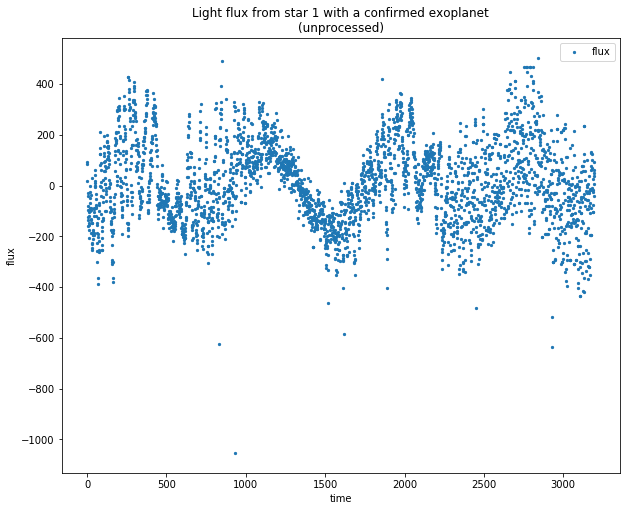

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_with_exoplanet, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 1 with a confirmed exoplanet\n(unprocessed)")
plt.xlabel('time')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

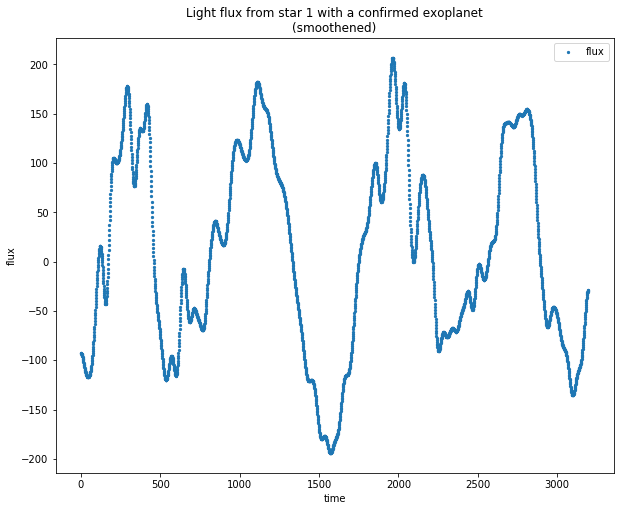

In [8]:
flux_star_with_exoplanet_smoothened = ndimage.filters.gaussian_filter(flux_star_with_exoplanet, sigma=20)
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_with_exoplanet_smoothened, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 1 with a confirmed exoplanet\n(smoothened)")
plt.xlabel('time')
plt.ylabel('flux')

### Scatter plot for star 5087 with confirmed non-exoplanet

Text(0, 0.5, 'flux')

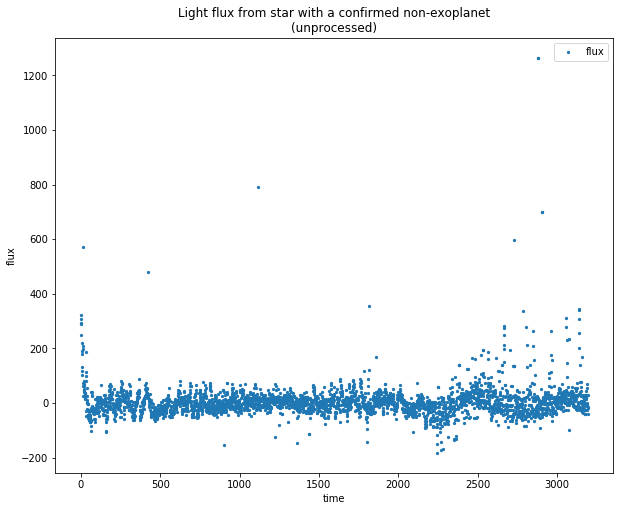

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_without_exoplanet, label='flux', s=5)
plt.legend()
plt.title("Light flux from star with a confirmed non-exoplanet\n(unprocessed)")
plt.xlabel('time')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

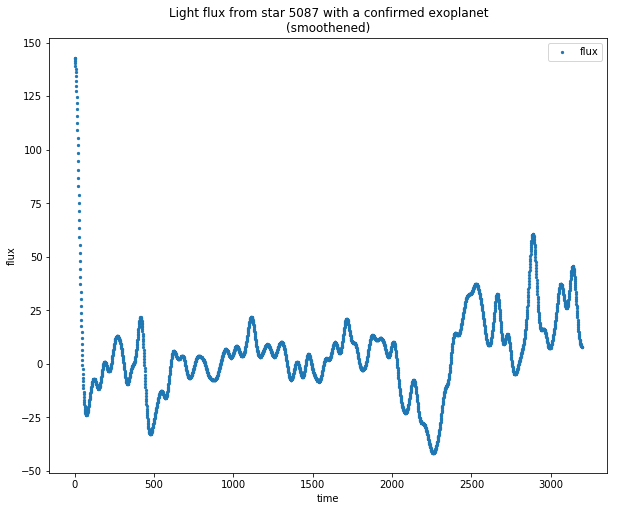

In [10]:
flux_star_without_exoplanet_smoothened = ndimage.filters.gaussian_filter(flux_star_without_exoplanet, sigma=20)
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_without_exoplanet_smoothened, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 5087 with a confirmed exoplanet\n(smoothened)")
plt.xlabel('time')
plt.ylabel('flux')

# Preprocess

### Normalize

In [11]:
X_train = normalize(X_train, norm = 'l2')
print("Normalized X_train:\n", X_train[0])
X_test = normalize(X_test, norm = 'l2')
print("\nNormalized X_test:\n", X_test[0])

Normalized X_train:
 [ 0.01030876  0.00920594  0.00220784 ...  0.00674656  0.000558
 -0.00434319]

Normalized X_test:
 [0.07109789 0.0594321  0.05127731 ... 0.02122024 0.15979234 0.03423232]


### Scale

In [12]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
print("Scaled X_train:\n", X_train[0])
X_test = std_scaler.fit_transform(X_test)
print("\nScaled X_test:\n", X_test[0])

Scaled X_train:
 [ 0.23429055  0.22008116  0.0614139  ...  0.3077973   0.00810645
 -0.27559759]

Scaled X_test:
 [1.66941609 1.48641482 1.34280954 ... 1.48073164 5.11125832 2.15508272]


# Define models

In [13]:
model_one = svm.SVC(kernel='linear', gamma='scale', random_state=42)
model_two = neighbors.KNeighborsClassifier(n_jobs=-1)

### SVC with linear kernel

In [14]:
model_one.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
accuracy_model_one_default = model_one.score(X_test, y_test)
print(accuracy_model_one_default)

0.9789473684210527


### Test SVC with linear kernel

In [16]:
y_predicted = model_one.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Recall: ", recall_score(y_test, y_predicted))
print("Precision: ", precision_score(y_test, y_predicted))
print("F1 score: ", f1_score(y_test, y_predicted))
print("Balanced accuracy score: ", balanced_accuracy_score(y_test, y_predicted))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_predicted))
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True negatives - stars with non-exoplanets, classified as non-exoplanets: ", tn)
print("False positives - stars with non-exoplanets, classified as exoplanets: ", fp)
print("False negatives - stars with exoplanets, classified as non-exoplanets: ", fn)
print("True positives - stars with exoplanets, classified as exoplanets: ", tp)

Accuracy:  0.9789473684210527
Recall:  0.9876106194690265
Precision:  0.9911190053285968
F1 score:  0.9893617021276595
Balanced accuracy score:  0.49380530973451325

Confusion matrix:
 [[558   7]
 [  5   0]]
True negatives - stars with non-exoplanets, classified as non-exoplanets:  558
False positives - stars with non-exoplanets, classified as exoplanets:  7
False negatives - stars with exoplanets, classified as non-exoplanets:  5
True positives - stars with exoplanets, classified as exoplanets:  0


### KNN

In [17]:
model_two.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
accuracy_model_two_default = model_two.score(X_test, y_test)
print(accuracy_model_two_default)

0.9912280701754386


### Test KNN

In [19]:
y_predicted = model_two.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Recall: ", recall_score(y_test, y_predicted))
print("Precision: ", precision_score(y_test, y_predicted))
print("F1 score: ", f1_score(y_test, y_predicted))
print("Balanced accuracy score: ", balanced_accuracy_score(y_test, y_predicted))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_predicted))
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True negatives - stars with non-exoplanets, classified as non-exoplanets: ", tn)
print("False positives - stars with non-exoplanets, classified as exoplanets: ", fp)
print("False negatives - stars with exoplanets, classified as non-exoplanets: ", fn)
print("True positives - stars with exoplanets, classified as exoplanets: ", tp)

Accuracy:  0.9912280701754386
Recall:  1.0
Precision:  0.9912280701754386
F1 score:  0.9955947136563876
Balanced accuracy score:  0.5

Confusion matrix:
 [[565   0]
 [  5   0]]
True negatives - stars with non-exoplanets, classified as non-exoplanets:  565
False positives - stars with non-exoplanets, classified as exoplanets:  0
False negatives - stars with exoplanets, classified as non-exoplanets:  5
True positives - stars with exoplanets, classified as exoplanets:  0


# Combine train and test data

In [20]:
combined_data = pd.concat([train_data, test_data])
print("(rows, columns) in combined data:", combined_data.shape)

(rows, columns) in combined data: (5657, 3198)


In [21]:
X_combined = np.array(combined_data.drop(['LABEL'], 1))
y_combined = np.array(combined_data['LABEL'])
print("X_combined: ", X_combined.shape)
print("y_combined: ", y_combined.shape)

X_combined:  (5657, 3197)
y_combined:  (5657,)


## Normalize and scale

In [22]:
# Normalize
X_combined = normalize(X_combined, norm = 'l2')
print("Normalized X_combined:\n", X_combined[0])
# Scale
std_scaler = StandardScaler()
X_combined = std_scaler.fit_transform(X_combined)
print("Scaled X_combined:\n", X_combined[0])

Normalized X_combined:
 [ 0.01030876  0.00920594  0.00220784 ...  0.00674656  0.000558
 -0.00434319]
Scaled X_combined:
 [ 0.22955912  0.21681844  0.05699611 ...  0.33251841  0.02480256
 -0.25188194]


## Balance dataset

In [23]:
sm = SMOTE(random_state=42, ratio=1.0)
X_combined_sm, y_combined_sm = sm.fit_sample(X_combined, y_combined)
print("Shape of original dataset:")
print("X: ", X_combined.shape)
print("y: ", y_combined.shape)
print("Shape of dataset after balancing:")
print("X: ", X_combined_sm.shape)
print("y: ", y_combined_sm.shape)
print("Number of non-exoplanets in original dataset: ", np.count_nonzero(y_combined == 1))
print("Number of exoplanets in original dataset: ", np.count_nonzero(y_combined == 2))
print("Number of non-exoplanets in balanced dataset: ", np.count_nonzero(y_combined_sm == 1))
print("Number of exoplanets in balanced dataset: ", np.count_nonzero(y_combined_sm == 2))

Shape of original dataset:
X:  (5657, 3197)
y:  (5657,)
Shape of dataset after balancing:
X:  (11230, 3197)
y:  (11230,)
Number of non-exoplanets in original dataset:  5615
Number of exoplanets in original dataset:  42
Number of non-exoplanets in balanced dataset:  5615
Number of exoplanets in balanced dataset:  5615


## Split up in different proportions

In [24]:
def split_data(percentage):
    return train_test_split(X_combined_sm,
                            y_combined_sm,
                            test_size=percentage,
                            random_state=42,
                            shuffle=True)

In [25]:
# Split data into train and test (60 : 40)
X_train_60, X_test_60, y_train_60, y_test_60 = split_data(0.40)
print(X_train_60.shape)
print(X_test_60.shape)
print(y_train_60.shape)
print(y_test_60.shape)

(6738, 3197)
(4492, 3197)
(6738,)
(4492,)


In [26]:
# Split data into train and test (65 : 35)
X_train_65, X_test_65, y_train_65, y_test_65 = split_data(0.35)
print(X_train_65.shape)
print(X_test_65.shape)
print(y_train_65.shape)
print(y_test_65.shape)

(7299, 3197)
(3931, 3197)
(7299,)
(3931,)


In [27]:
# Split data into train and test (70 : 30)
X_train_70, X_test_70, y_train_70, y_test_70 = split_data(0.30)
print(X_train_70.shape)
print(X_test_70.shape)
print(y_train_70.shape)
print(y_test_70.shape)

(7861, 3197)
(3369, 3197)
(7861,)
(3369,)


In [28]:
# Split data into train and test (75 : 25)
X_train_75, X_test_75, y_train_75, y_test_75 = split_data(0.25)
print(X_train_75.shape)
print(X_test_75.shape)
print(y_train_75.shape)
print(y_test_75.shape)

(8422, 3197)
(2808, 3197)
(8422,)
(2808,)


In [29]:
# Split data into train and test (80 : 20)
X_train_80, X_test_80, y_train_80, y_test_80 = split_data(0.20)
print(X_train_80.shape)
print(X_test_80.shape)
print(y_train_80.shape)
print(y_test_80.shape)

(8984, 3197)
(2246, 3197)
(8984,)
(2246,)


In [30]:
# Split data into train and test (85 : 15)
X_train_85, X_test_85, y_train_85, y_test_85 = split_data(0.15)
print(X_train_85.shape)
print(X_test_85.shape)
print(y_train_85.shape)
print(y_test_85.shape)

(9545, 3197)
(1685, 3197)
(9545,)
(1685,)


In [31]:
# Split data into train and test (87 : 13)
X_train_87, X_test_87, y_train_87, y_test_87 = split_data(0.13)
print(X_train_87.shape)
print(X_test_87.shape)
print(y_train_87.shape)
print(y_test_87.shape)

(9770, 3197)
(1460, 3197)
(9770,)
(1460,)


## SVC with linear kernel on different percentages of training data

In [32]:
accuracy_model_one = []
print("SVC with linear kernel on 60% training data")
model_one.fit(X_train_60, y_train_60)
model_one_60 = model_one.score(X_test_60, y_test_60)
print(model_one_60)
accuracy_model_one.append(model_one_60)

print("SVC with linear kernel on 65% training data")
model_one.fit(X_train_65, y_train_65)
model_one_65 = model_one.score(X_test_65, y_test_65)
print(model_one_65)
accuracy_model_one.append(model_one_65)

print("SVC with linear kernel on 70% training data")
model_one.fit(X_train_70, y_train_70)
model_one_70 = model_one.score(X_test_70, y_test_70)
print(model_one_70)
accuracy_model_one.append(model_one_70)

print("SVC with linear kernel on 75% training data")
model_one.fit(X_train_75, y_train_75)
model_one_75 = model_one.score(X_test_75, y_test_75)
print(model_one_75)
accuracy_model_one.append(model_one_75)

print("SVC with linear kernel on 80% training data")
model_one.fit(X_train_80, y_train_80)
model_one_80 = model_one.score(X_test_80, y_test_80)
print(model_one_80)
accuracy_model_one.append(model_one_80)

print("SVC with linear kernel on 85% training data")
model_one.fit(X_train_85, y_train_85)
model_one_85 = model_one.score(X_test_85, y_test_85)
print(model_one_85)
accuracy_model_one.append(model_one_85)

print("SVC with linear kernel on 87% training data")
model_one.fit(X_train_87, y_train_87)
model_one_87 = model_one.score(X_test_87, y_test_87)
print(model_one_87)
accuracy_model_one.append(model_one_87)

print("SVC (linear) accuracies:\n", accuracy_model_one)

SVC with linear kernel on 60% training data
0.9906500445235975
SVC with linear kernel on 65% training data
0.9936402950903078
SVC with linear kernel on 70% training data
0.9940635203324428
SVC with linear kernel on 75% training data
0.9939458689458689
SVC with linear kernel on 80% training data
0.9928762243989314
SVC with linear kernel on 85% training data
0.9946587537091988
SVC with linear kernel on 87% training data
0.9958904109589041
SVC (linear) accuracies:
 [0.9906500445235975, 0.9936402950903078, 0.9940635203324428, 0.9939458689458689, 0.9928762243989314, 0.9946587537091988, 0.9958904109589041]


### Performance metrics for SVC with linear kernel on balanced, 87% training data

In [33]:
y_predicted_sm = model_one.predict(X_test_87)
print("Accuracy: ", accuracy_score(y_test_87, y_predicted_sm))
print("Recall: ", recall_score(y_test_87, y_predicted_sm))
print("Precision: ", precision_score(y_test_87, y_predicted_sm))
print("F1 score: ", f1_score(y_test_87, y_predicted_sm))
print("Balanced accuracy score: ", balanced_accuracy_score(y_test_87, y_predicted_sm))
print("\nConfusion matrix:\n", confusion_matrix(y_test_87, y_predicted_sm))
tn, fp, fn, tp = confusion_matrix(y_test_87, y_predicted_sm).ravel()
print("True negatives - stars with non-exoplanets, classified as non-exoplanets: ", tn)
print("False positives - stars with non-exoplanets, classified as exoplanets: ", fp)
print("False negatives - stars with exoplanets, classified as non-exoplanets: ", fn)
print("True positives - stars with exoplanets, classified as exoplanets: ", tp)

Accuracy:  0.9958904109589041
Recall:  0.9919463087248322
Precision:  1.0
F1 score:  0.9959568733153639
Balanced accuracy score:  0.9959731543624162

Confusion matrix:
 [[739   6]
 [  0 715]]
True negatives - stars with non-exoplanets, classified as non-exoplanets:  739
False positives - stars with non-exoplanets, classified as exoplanets:  6
False negatives - stars with exoplanets, classified as non-exoplanets:  0
True positives - stars with exoplanets, classified as exoplanets:  715


## KNN on different percentages of training data

In [34]:
accuracy_model_two = []
print("KNN on 60% training data")
model_two.fit(X_train_60, y_train_60)
model_two_60 = model_two.score(X_test_60, y_test_60)
print(model_two_60)
accuracy_model_two.append(model_two_60)

print("KNN on 65% training data")
model_two.fit(X_train_65, y_train_65)
model_two_65 = model_two.score(X_test_65, y_test_65)
print(model_two_65)
accuracy_model_two.append(model_two_65)

print("KNN on 70% training data")
model_two.fit(X_train_70, y_train_70)
model_two_70 = model_two.score(X_test_70, y_test_70)
print(model_two_70)
accuracy_model_two.append(model_two_70)

print("KNN on 75% training data")
model_two.fit(X_train_75, y_train_75)
model_two_75 = model_two.score(X_test_75, y_test_75)
print(model_two_75)
accuracy_model_two.append(model_two_75)

print("KNN on 80% training data")
model_two.fit(X_train_80, y_train_80)
model_two_80 = model_two.score(X_test_80, y_test_80)
print(model_two_80)
accuracy_model_two.append(model_two_80)

print("KNN on 85% training data")
model_two.fit(X_train_85, y_train_85)
model_two_85 = model_two.score(X_test_85, y_test_85)
print(model_two_85)
accuracy_model_two.append(model_two_85)

print("KNN on 87% training data")
model_two.fit(X_train_87, y_train_87)
model_two_87 = model_two.score(X_test_87, y_test_87)
print(model_two_87)
accuracy_model_two.append(model_two_87)

print("KNN accuracies:\n", accuracy_model_two)

KNN on 60% training data
0.9741763134461264
KNN on 65% training data
0.9760875095395574
KNN on 70% training data
0.9774413772632828
KNN on 75% training data
0.9782763532763533
KNN on 80% training data
0.9759572573463936
KNN on 85% training data
0.9780415430267062
KNN on 87% training data
0.9780821917808219
KNN accuracies:
 [0.9741763134461264, 0.9760875095395574, 0.9774413772632828, 0.9782763532763533, 0.9759572573463936, 0.9780415430267062, 0.9780821917808219]


### Performance metrics for KNN on balanced, 87% training data

In [35]:
y_predicted_sm = model_two.predict(X_test_87)
print("Accuracy: ", accuracy_score(y_test_87, y_predicted_sm))
print("Recall: ", recall_score(y_test_87, y_predicted_sm))
print("Precision: ", precision_score(y_test_87, y_predicted_sm))
print("F1 score: ", f1_score(y_test_87, y_predicted_sm))
print("Balanced accuracy score: ", balanced_accuracy_score(y_test_87, y_predicted_sm))
print("\nConfusion matrix:\n", confusion_matrix(y_test_87, y_predicted_sm))
tn, fp, fn, tp = confusion_matrix(y_test_87, y_predicted_sm).ravel()
print("True negatives - stars with non-exoplanets, classified as non-exoplanets: ", tn)
print("False positives - stars with non-exoplanets, classified as exoplanets: ", fp)
print("False negatives - stars with exoplanets, classified as non-exoplanets: ", fn)
print("True positives - stars with exoplanets, classified as exoplanets: ", tp)

Accuracy:  0.9780821917808219
Recall:  0.9570469798657718
Precision:  1.0
F1 score:  0.9780521262002744
Balanced accuracy score:  0.9785234899328858

Confusion matrix:
 [[713  32]
 [  0 715]]
True negatives - stars with non-exoplanets, classified as non-exoplanets:  713
False positives - stars with non-exoplanets, classified as exoplanets:  32
False negatives - stars with exoplanets, classified as non-exoplanets:  0
True positives - stars with exoplanets, classified as exoplanets:  715


In [36]:
original_training_data_size = train_data.shape[0] / combined_data.shape[0] * 100
print("Original training data size: ", original_training_data_size, "%")

Original training data size:  89.92398797949444 %


## Plot

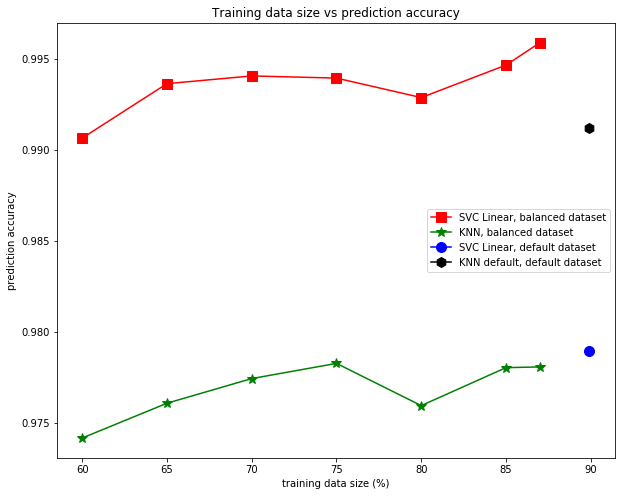

In [37]:
training_data_size = [60, 65, 70, 75, 80, 85, 87]

plt.figure(figsize=(10,8))
plt.plot(training_data_size, accuracy_model_one, marker='s', markersize=10, color='r', label='SVC Linear, balanced dataset')
plt.plot(training_data_size, accuracy_model_two, marker='*', markersize=10, color='g', label='KNN, balanced dataset')

plt.plot(original_training_data_size, accuracy_model_one_default, marker='o', markersize=10, color='b', label='SVC Linear, default dataset')
plt.plot(original_training_data_size, accuracy_model_two_default, marker='h', markersize=10, color='k', label='KNN default, default dataset')

plt.xlabel('training data size (%)')
plt.ylabel('prediction accuracy')
plt.title('Training data size vs prediction accuracy')
plt.legend()


### Compare train_test_split and cross validation

In [38]:
cv_scores_one = cross_val_score(model_one, X_combined_sm, y_combined_sm, cv=7)
# print each cv score (accuracy) and average them
print(cv_scores_one)
print('cv_scores mean for model_one: {}'.format(np.mean(cv_scores_one)))

[0.99377335 0.99625935 0.99189526 0.99376559 0.99376559 0.99563591
 0.99438903]
cv_scores mean for model_one: 0.9942120104471076


In [39]:
cv_scores_two = cross_val_score(model_two, X_combined_sm, y_combined_sm, cv=7)
# print each cv score (accuracy) and average them
print(cv_scores_two)
print('cv_scores mean for model_two: {}'.format(np.mean(cv_scores_two)))

[0.97820672 0.97069825 0.9819202  0.97506234 0.98254364 0.98753117
 0.9894015 ]
cv_scores mean for model_two: 0.980766261716284


In [40]:
print('train_test_split scores mean for model_one: {}'.format(np.mean(accuracy_model_one)))
print('train_test_split scores mean for model_two: {}'.format(np.mean(accuracy_model_two)))

train_test_split scores mean for model_one: 0.9936750168513216
train_test_split scores mean for model_two: 0.9768660779541773
